## Preparacion Datos KMeans

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


In [2]:
#Cargar datos
df_bank=pd.read_csv('BancAlpes_credit_card_data.csv', sep=';', encoding = 'utf-8', index_col=0)

In [4]:
#df_bank

In [7]:
#Numero filas y columnas
df_bank.shape

(660, 10)

In [8]:
#Exploracion Datos
df_bank.head()

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073,20000,Female,2,Married,24,2,1,1,0
2,38414,120000,Female,2,Single,26,3,0,10,9
3,17341,90000,Female,2,Single,34,7,1,3,4
4,40496,50000,Female,2,Married,37,5,1,1,?
5,47437,50000,Male,2,Married,57,6,0,12,3


In [10]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             660 non-null    object
 1   Limit_bal            660 non-null    object
 2   Sex                  660 non-null    object
 3   Education            660 non-null    object
 4   Marriage             660 non-null    object
 5   Age                  660 non-null    object
 6   Total_Credit_Cards   660 non-null    object
 7   Total_visits_bank    660 non-null    object
 8   Total_visits_online  660 non-null    object
 9   Total_calls_made     660 non-null    object
dtypes: object(10)
memory usage: 56.7+ KB


In [16]:
df_bank.isnull().values.any() #No hay valores nulos en el DF

False

In [53]:
#Ver datos raros
print(df_bank['Education'].unique())
print(df_bank['Sex'].unique())
#print(df_bank['Customer'].unique())
print(df_bank['Total_Credit_Cards'].unique())
print(df_bank['Total_visits_bank'].unique())
print(df_bank['Total_calls_made'].unique())
print(df_bank['Marriage'].unique())

['2' '1' '3' 'ABC' '-' '5' '4' '6']
['Female' 'Male' 'Fmale' 'Femael' 'f' '-' 'M ' 'F' '9' 'Mael']
['2' '3' '7' '5' '6' '4' '1' '-' '123456789' '9' '8' '10']
['1' '0' '-' '2' '?' '5' '3' '4']
['0' '9' '4' '?' '3' '8' '2' '1' '7' '5' '6' '10' '-']
['Married' 'Single' '-' 'Others' '?' '2' '1' '0']


In [61]:
#Eliminar datos erroneos
df_bank_prep=df_bank[df_bank['Customer']!='-']
df_bank_prep=df_bank[df_bank['Sex']!='Femael']
df_bank_prep=df_bank[df_bank['Sex']!='9']
df_bank_prep=df_bank[df_bank['Sex']!='Mael']
df_bank_prep=df_bank[df_bank['Sex']!='Fmale']
df_bank_prep= df_bank_prep[df_bank_prep['Education'] != 'ABC']
df_bank_prep= df_bank_prep[df_bank_prep['Education'] != '-']
df_bank_prep=df_bank_prep[df_bank_prep['Total_Credit_Cards']!='-']
df_bank_prep=df_bank_prep[df_bank_prep['Total_Credit_Cards']!='123456789']
df_bank_prep=df_bank_prep[df_bank_prep['Total_visits_bank']!='?']
df_bank_prep=df_bank_prep[df_bank_prep['Total_calls_made']!='?']
df_bank_prep=df_bank_prep[df_bank_prep['Marriage']!='?']
df_bank_prep=df_bank_prep[df_bank_prep['Marriage']!='-']

In [62]:
df_bank_prep.describe()

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,651,651,651,651,651,651,651,651,651,651
unique,646,54,8,6,6,47,10,6,16,11
top,96929,50000,Female,2,Single,27,4,2,2,4
freq,2,80,370,287,376,37,149,158,187,105


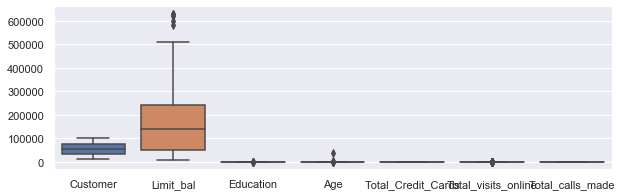

In [59]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(10,3))
ax = sns.boxplot(data=df_bank_prep, orient="v")

In [64]:
print(df_bank['Limit_bal'].unique())

['20000' '120000' '90000' '50000' '500000' '100000' '140000' '200000'
 '260000' '630000' '70000' '250000' '320000' '360000' '180000' '130000'
 '450000' '60000' '230000' '-' '160000' '280000' '10000' '40000' '210000'
 '150000' '380000' '310000' '400000' '80000' '290000' '340000' '300000'
 '30000' '240000' '470000' '480000' '350000' '330000' '110000' '420000'
 '170000' '370000' '270000' '220000' '190000' '510000' '460000' '440000'
 '410000' '490000' '390000' '580000' '600000' '620000']


In [66]:
df_bank_prep= df_bank_prep[df_bank_prep['Limit_bal'] != '-']

In [70]:
#Variables no numericas
name_cols_non_number = df_bank_prep.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Customer', 'Limit_bal', 'Sex', 'Education', 'Marriage', 'Age',
       'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online',
       'Total_calls_made'],
      dtype='object')

In [71]:
#Transformar a numericas
df_bank_prep['Customer']=df_bank_prep['Customer'].astype(int)
df_bank_prep['Limit_bal']=df_bank_prep['Limit_bal'].astype(int)
df_bank_prep['Education']=df_bank_prep['Education'].astype(int)
df_bank_prep['Age']=df_bank_prep['Age'].astype(int)
df_bank_prep['Total_Credit_Cards']=df_bank_prep['Total_Credit_Cards'].astype(int)
df_bank_prep['Total_visits_bank']=df_bank_prep['Total_visits_bank'].astype(int)
df_bank_prep['Total_visits_online']=df_bank_prep['Total_visits_online'].astype(int)
df_bank_prep['Total_calls_made']=df_bank_prep['Total_calls_made'].astype(int)

In [73]:
#Revisar completitud
df_bank_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 1 to 660
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             651 non-null    int64 
 1   Limit_bal            651 non-null    int64 
 2   Sex                  651 non-null    object
 3   Education            651 non-null    int64 
 4   Marriage             651 non-null    object
 5   Age                  651 non-null    int64 
 6   Total_Credit_Cards   651 non-null    int64 
 7   Total_visits_bank    651 non-null    int64 
 8   Total_visits_online  651 non-null    int64 
 9   Total_calls_made     651 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 55.9+ KB


In [76]:
print(df_bank_prep['Sex'].unique())

['Female' 'Male' 'Femael' 'f' 'M ' 'F' '9' 'Mael']


In [81]:
#Transformar columna sex a valores enteros
df_bank_prep['Sex'] = [s.replace("Female", "0") for s in df_bank_prep['Sex']]
df_bank_prep['Sex'] = [s.replace("Femael", "0") for s in df_bank_prep['Sex']]
df_bank_prep['Sex'] = [s.replace("f", "0") for s in df_bank_prep['Sex']]
df_bank_prep['Sex'] = [s.replace("F", "0") for s in df_bank_prep['Sex']]
df_bank_prep['Sex'] = [s.replace("Male", "1") for s in df_bank_prep['Sex']]
df_bank_prep['Sex'] = [s.replace("Mael", "1") for s in df_bank_prep['Sex']]
df_bank_prep['Sex'] = [s.replace("M", "1") for s in df_bank_prep['Sex']]

df_bank_prep['Sex'] = df_bank_prep['Sex'].astype(int)


AttributeError: 'int' object has no attribute 'replace'

In [84]:
#Exploracion variable sexo
df_bank_prep=df_bank_prep[df_bank_prep['Sex']!=9]
df_bank_prep['Sex'].value_counts()

0    376
1    274
Name: Sex, dtype: int64

In [90]:
#Ver variable marriage
print(df_bank_prep['Marriage'].unique())

[0 1 2]


In [89]:
#Transformar marriage a valores numericos
df_bank_prep['Marriage'] = [s.replace("Married", "0") for s in df_bank_prep['Marriage']]
df_bank_prep['Marriage'] = [s.replace("Single", "1") for s in df_bank_prep['Marriage']]
df_bank_prep['Marriage'] = [s.replace("Others", "2") for s in df_bank_prep['Marriage']]

df_bank_prep['Marriage'] = df_bank_prep['Marriage'].astype(int)

AttributeError: 'int' object has no attribute 'replace'

In [91]:
print(df_bank_prep['Marriage'].unique())

[0 1 2]


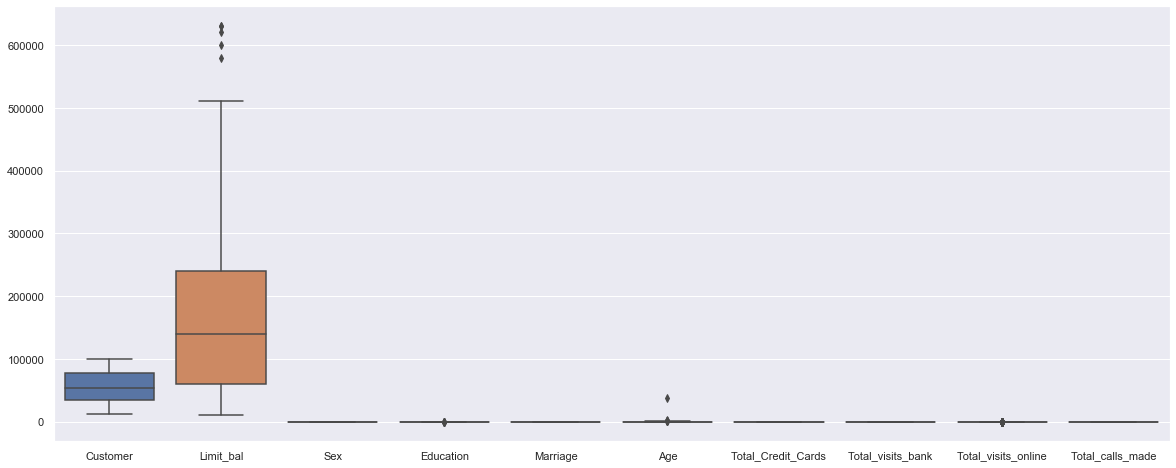

In [93]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_bank_prep, orient="v")

Aca vemos que las variable limit_bal hace que las magnitudes se salgan de proporcion, por tal motivo es mejor normalizar

In [95]:
#Columnas con valores numericos
cols_number = ['Limit_bal','Age','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

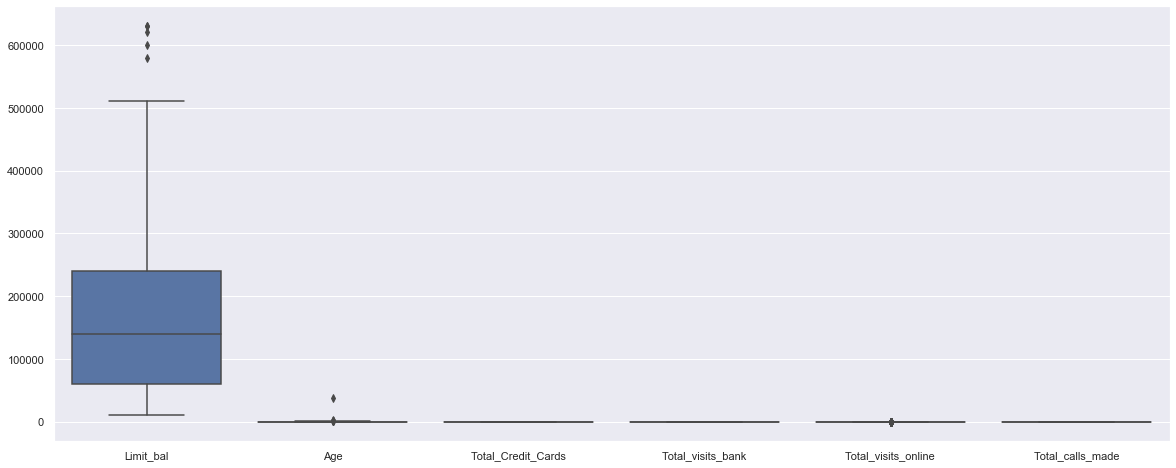

In [97]:
#Visualizacion datos exclusivamente numericos
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_bank_prep[cols_number], orient="v")

In [112]:
print(df_bank_prep['Age'].unique())

[   24    26    34    57    37    29    23    28    35    41    30    49
    39    40    27    47    32    54    22    31    33    25  2202 36745
    46   789    43    45    51    56    44    53    38    63    36    52
    48    55    60    50    42    75    58    61    73    59    21]


In [114]:
df_bank_prep=df_bank_prep[df_bank_prep['Age']!=2202]
df_bank_prep=df_bank_prep[df_bank_prep['Age']!=36745]

## Normalizacion

In [115]:
mms = MinMaxScaler() #Para normalizar: MinMaxScaler

In [116]:
df_bank_prep_norm = mms.fit_transform(df_bank_prep.copy()) #normalizar
saved_cols = df_bank_prep.columns

df_bank_prep_norm = pd.DataFrame(df_bank_prep_norm, columns =saved_cols)

In [117]:
df_bank_prep_norm.describe()

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,0.496228,0.258488,0.421296,0.158025,0.308642,0.019821,0.415809,0.486111,0.173045,0.353241
std,0.290095,0.208243,0.494148,0.155965,0.260102,0.040425,0.240529,0.326176,0.197112,0.285219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256130,0.080645,0.000000,0.000000,0.000000,0.009115,0.222222,0.200000,0.066667,0.100000
50%,0.481598,0.209677,0.000000,0.200000,0.500000,0.015625,0.444444,0.400000,0.133333,0.300000
75%,0.747070,0.370968,1.000000,0.200000,0.500000,0.026042,0.555556,0.800000,0.266667,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


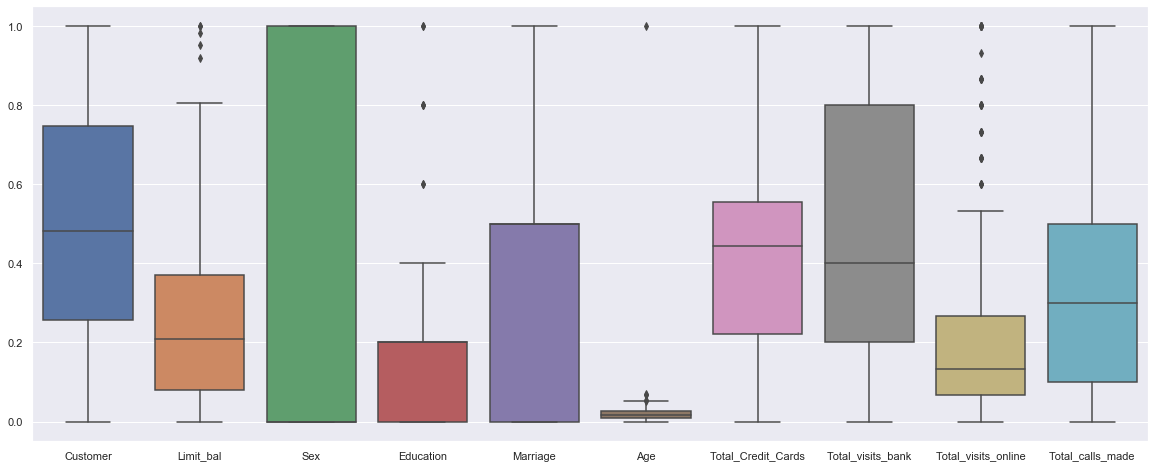

In [118]:
#Visualización de todas las variables normalizadas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_bank_prep_norm, orient="v")

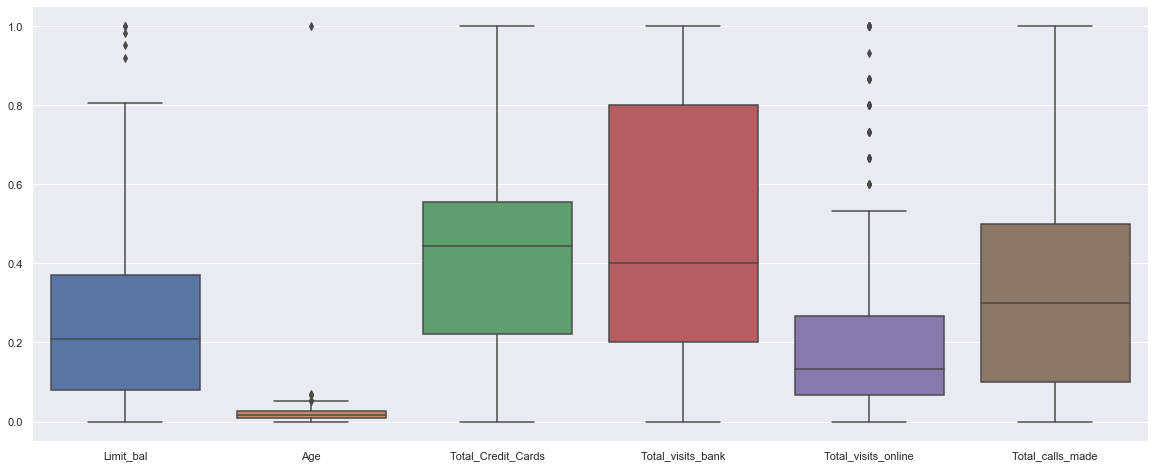

In [119]:
#Visualización de todas las variables NUMERICAS normalizadas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_bank_prep_norm[cols_number], orient="v")

Aca vemos que con las variables normalizadas las magnitudes son mejor comparables para hacer un posterior analisis

## Modelo KMeans

Variables a utilizar: Total_credit_cards , Total_visits_bank , Total_visits_online

In [120]:
cols_analisis = ['Total_Credit_Cards','Total_visits_bank','Total_visits_online']

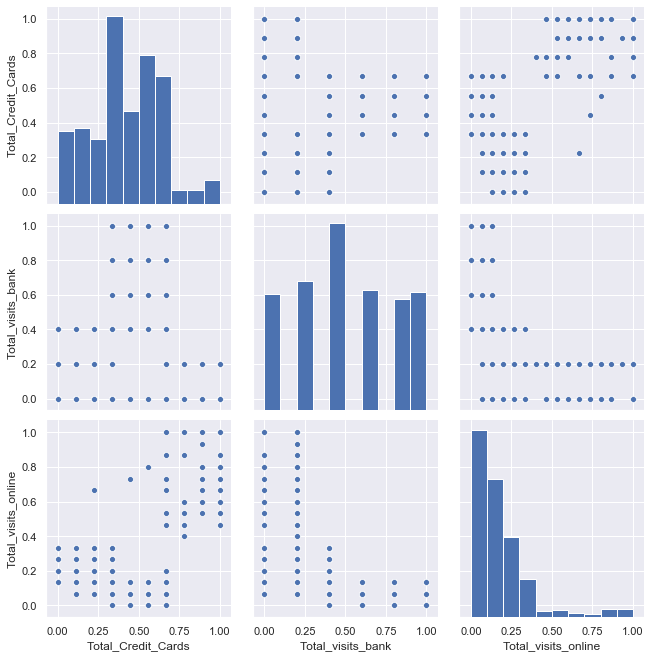

In [123]:
#Ver si existe una agrupacion natural
sns.pairplot(df_bank_prep_norm.dropna(), height=3,vars=cols_analisis,kind='scatter')

### Metodo del Codo

Para saber cuantos clusters utilizar

In [124]:
#Graficar el Codo de los cluster
def plot_distortion(data, k_min=1,  k_max=11, ylabel = 'Distortion',xlabel = 'Numero de clusters', title = 'Distorcionn'):
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

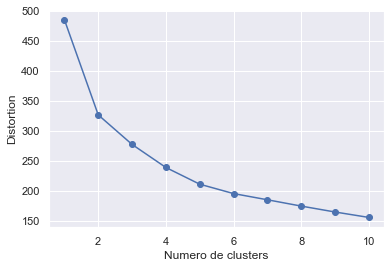

In [127]:
plot_distortion(df_bank_prep_norm,1,11)

Aca tenemos dos posibles codos, el K=3 o el K=4

In [139]:
#Tener en cuenta solo variables seleccionadas
df_bank_prep_norm_1 = pd.DataFrame(df_bank_prep_norm, columns =cols_analisis)

#### Modelo con K = 3

In [140]:
kmeans = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0) 
kmeans = kmeans.fit(df_bank_prep_norm_1)

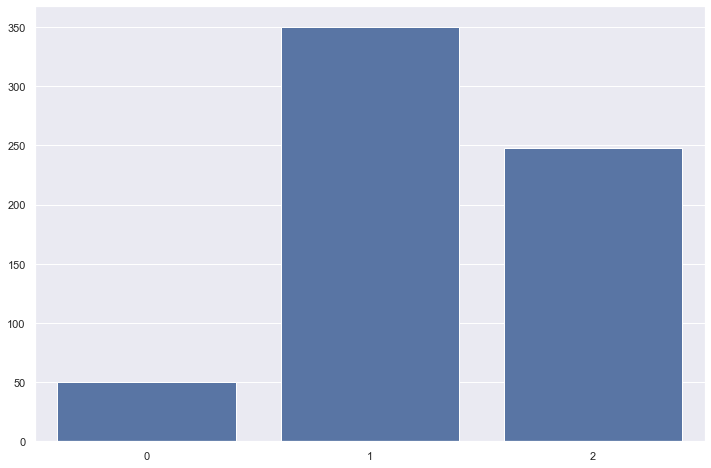

In [142]:
#Ver resultados
labels = kmeans.labels_
df_bank_prep_norm_1['Cluster'] = labels

cluster_distrib = df_bank_prep_norm_1['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [143]:
df_bank_prep_norm_1.groupby('Cluster').count()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online
Cluster,,,
0,50,50,50
1,350,350,350
2,248,248,248


In [147]:
#Transformar valores a arreglo
cols_analisis_arr = df_bank_prep_norm_1.to_numpy()

Graficar

Visitas bancos vs total credit cards

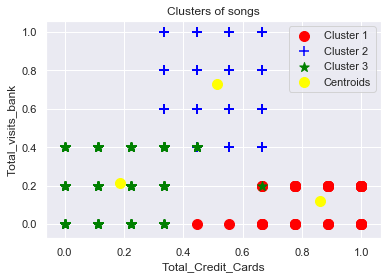

In [150]:
plt.scatter(cols_analisis_arr[kmeans.labels_ == 0, 0], cols_analisis_arr[kmeans.labels_ == 0, 1], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_analisis_arr[kmeans.labels_ == 1, 0], cols_analisis_arr[kmeans.labels_ == 1, 1], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_analisis_arr[kmeans.labels_ == 2, 0], cols_analisis_arr[kmeans.labels_ == 2, 1], s = 100, marker='*', c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(cols_analisis[0])
plt.ylabel(cols_analisis[1])
plt.legend()
plt.show()

Visitas bancos vs Visitas online

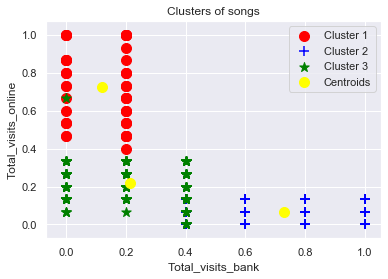

In [157]:
plt.scatter(cols_analisis_arr[kmeans.labels_ == 0, 1], cols_analisis_arr[kmeans.labels_ == 0, 2], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_analisis_arr[kmeans.labels_ == 1, 1], cols_analisis_arr[kmeans.labels_ == 1, 2], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_analisis_arr[kmeans.labels_ == 2, 1], cols_analisis_arr[kmeans.labels_ == 2, 2], s = 100, marker='*', c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(cols_analisis[1])
plt.ylabel(cols_analisis[2])
plt.legend()
plt.show()

Total credit cards vs Visitas online

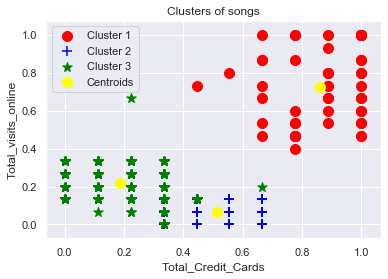

In [159]:
plt.scatter(cols_analisis_arr[kmeans.labels_ == 0, 0], cols_analisis_arr[kmeans.labels_ == 0, 2], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_analisis_arr[kmeans.labels_ == 1, 0], cols_analisis_arr[kmeans.labels_ == 1, 2], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_analisis_arr[kmeans.labels_ == 2, 0], cols_analisis_arr[kmeans.labels_ == 2, 2], s = 100, marker='*', c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(cols_analisis[0])
plt.ylabel(cols_analisis[2])
plt.legend()
plt.show()

Grafica de las tres dimensiones

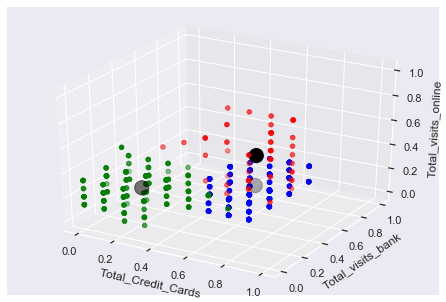

In [161]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_analisis_arr[kmeans.labels_ == 0, 0], cols_analisis_arr[kmeans.labels_ == 0, 1], cols_analisis_arr[kmeans.labels_ == 0, 2],color='red')
ax.scatter(cols_analisis_arr[kmeans.labels_ == 2, 0], cols_analisis_arr[kmeans.labels_ == 2, 1], cols_analisis_arr[kmeans.labels_ == 2, 2],color='green')
ax.scatter(cols_analisis_arr[kmeans.labels_ == 1, 0], cols_analisis_arr[kmeans.labels_ == 1, 1], cols_analisis_arr[kmeans.labels_ == 1, 2],color='blue')

ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color='black',marker='o',s=200, label='centroids')
ax.set_xlabel(cols_analisis[0])
ax.set_ylabel(cols_analisis[1])
ax.set_zlabel(cols_analisis[2])
plt.show()

In [163]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2]


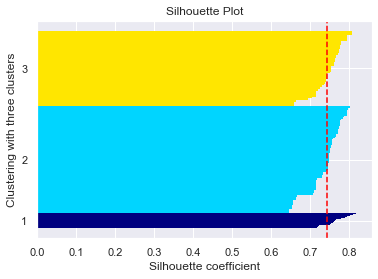

In [165]:
plot_silhouette(data = df_bank_prep_norm_1, 
                labels = kmeans.labels_, 
                ylabel = 'Clustering with three clusters')

In [168]:
#Score de la silueta
silhouette_avg = silhouette_score(cols_analisis_arr, kmeans.labels_)
silhouette_avg

0.7430193286145073

## Modelo con K = 4

In [173]:
kmeans4 = KMeans(n_clusters=4,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0) 
kmeans4 = kmeans4.fit(df_bank_prep_norm_1)

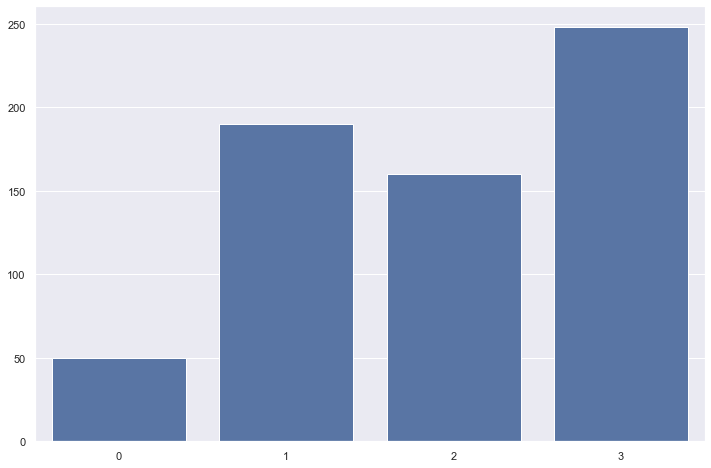

In [174]:
#Ver resultados
labels = kmeans4.labels_
df_bank_prep_norm_1['Cluster'] = labels

cluster_distrib = df_bank_prep_norm_1['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [175]:
cols_analisis_arr = df_bank_prep_norm_1.to_numpy()

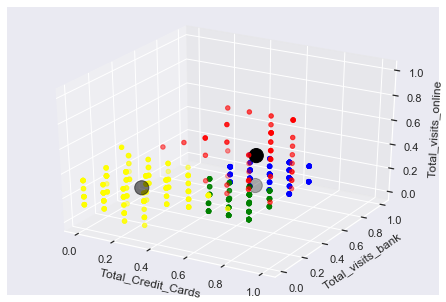

In [181]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_analisis_arr[kmeans4.labels_ == 0, 0], cols_analisis_arr[kmeans4.labels_ == 0, 1], cols_analisis_arr[kmeans4.labels_ == 0, 2],color='red')
ax.scatter(cols_analisis_arr[kmeans4.labels_ == 2, 0], cols_analisis_arr[kmeans4.labels_ == 2, 1], cols_analisis_arr[kmeans4.labels_ == 2, 2],color='green')
ax.scatter(cols_analisis_arr[kmeans4.labels_ == 1, 0], cols_analisis_arr[kmeans4.labels_ == 1, 1], cols_analisis_arr[kmeans4.labels_ == 1, 2],color='blue')
ax.scatter(cols_analisis_arr[kmeans4.labels_ == 3, 0], cols_analisis_arr[kmeans4.labels_ == 3, 1], cols_analisis_arr[kmeans4.labels_ == 3, 2],color='yellow')

ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color='black',marker='o',s=200, label='centroids')
ax.set_xlabel(cols_analisis[0])
ax.set_ylabel(cols_analisis[1])
ax.set_zlabel(cols_analisis[2])
plt.show()

In [182]:
silhouette_avg = silhouette_score(cols_analisis_arr, kmeans4.labels_)
silhouette_avg

0.7733084914256768